### Метод Фибоначчи

In [3]:
import numpy as np
import pandas as pd
from math import ceil, pi, sqrt
import matplotlib.pyplot as plt
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
import plotly.graph_objects as go

In [1]:
def FibWithDecimal(n):

    root_5 = 5 ** 0.5
    phi = ((1 + root_5) / 2)

    a = ((phi ** n) - ((-phi) ** -n)) / root_5

    return round(a)

In [2]:
def Fib_method(f=lambda x: x, a=-1, b=1, eps=0.01, plot=False):
    r = len(str(eps)) + 1
    n = 1
    fib_n = FibWithDecimal(n)
    while fib_n <= (b - a) / eps:
        n += 1
        fib_n = FibWithDecimal(n)
    x1 = a + (b - a) * FibWithDecimal(n-2)/FibWithDecimal(n)
    x2 = a + (b - a) * FibWithDecimal(n-1)/FibWithDecimal(n)
    f1 = f(x1)
    f2 = f(x2)
    n = n - 1
    iters = 0
    while n != 1:
        iters += 1
        if f1 > f2:
            a = x1
            x1 = x2
            x2 = b - (x1 - a)
            f1 = f2
            f2 = f(x2)
        else:
            b = x2
            x2 = x1
            x1 = a + (b - x2)
            f2 = f1
            f1 = f(x1)
        n -= 1
    x = (x1 + x2) / 2
    
    print(f'Минимум функции достигается в точке {round(x, r)} и равен {round(f(x), r)}')
    print()
    print(f'Понадобилось итераций: {iters}')  

### Метод золотого сечения

In [4]:
def golden_ratio(func=lambda x: x, a=1, b=2, eps=0.01, plot=False):
    assert eps > 0, 'eps must be greater than 0'
    a0 = a
    b0 = b
    phi = (1 + sqrt(5)) / 2
    resphi = 2 - phi
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)
    f1 = func(x1)
    f2 = func(x2)
    l = np.inf
    iters = 0
    x1s = [x1]
    x2s = [x2]
    df = pd.DataFrame({'N': [iters], 'a': [a], 'b': [b], 'x1': [x1],
                  'x2': [x2], 'f1': [f1], 'f2': [f2]})
    df['N'] = df['N'].astype(int)
    r = len(str(eps)) + 1
    while l > eps:
        iters += 1
        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + resphi * (b - a)
            f1 = f(x1)
            
        else:
            a = x1
            x1 = x2
            
            f1 = f2
            x2 = b - resphi * (b - a)
            f2 = f(x2)
        to_append = pd.Series([iters, a, b, x1, x2, f1, f2], index=df.columns)
        df = df.append(to_append, ignore_index=True)
        l = abs(b - a)
    
    x_opt = (a + b) / 2  
    if plot:
        points = np.linspace(x_opt - 2.5, x_opt + 2.5, 50)
        values = func(points)
        plt.ylim(0, func(x_opt) + 10)
        plt.plot(points, values, c='black')
        plt.plot(points, [f(x_opt)] * len(points), c='r')
        plt.plot(x_opt, f(x_opt), marker='x', markersize=10, c='r')       
        plt.grid(True) 
        plt.show()
        plt.scatter(df['x1'], df['f1'], c='r')
        plt.scatter(df['x2'], df['f2'], c='b')
        plt.plot(points, values, c='black')
        plt.grid(True) 
        plt.show()       
    print(f'Минимум функции на отрезке [{a0}, {b0}] достигается в точке {round(x_opt, r)} и равен {round(f(x_opt), r)}')
    print()
    print(f'Понадобилось итераций: {iters}')       
    return df

In [5]:
def f(x):
    return x**4 + 3 * x**3 + 7 * x**2 + 9

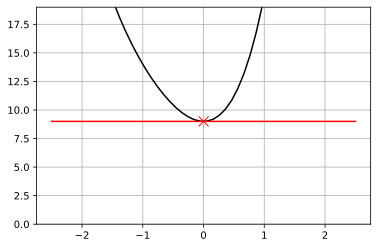

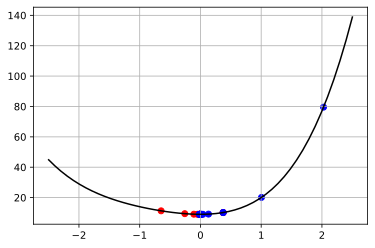

Минимум функции на отрезке [-2.3, 4.7] достигается в точке 0.00125 и равен 9.00001

Понадобилось итераций: 14


In [6]:
df = golden_ratio(f, -2.3, 4.7, eps=0.01, plot=True)

### Поиск отрезка локализации минимума унимодальной функции

In [7]:
def unimod(func, x, d=0.1):
    f1, f2 = f(x), f(x + d)
    if f1 > f2:
        a = x
        x += d
        f1 = f2
    else:
        if f(x - d) >= f(x):
            return [x - d, x + d]
        b = x
        x = x - d
        f1 = f(x - d)
        d = - d
    k = 2
    x_k = x + (2 ** (k - 1)) * d
    f_k = f(x_k)
    while f(x) > f(x_k):
        if d > 0:
            a = x
        else:
            b = x
        k += 1
        x = x_k
        x_k = x + (2 ** (k - 1)) * d
    if d > 0:
        b = x_k
    else:
        a = x_k
    return [a, b]

In [8]:
unimod(f, 2, 0.3)

[-2.5, 1.1]

### Метод дихотомии

In [9]:
import numpy as np
from math import ceil, pi
import matplotlib.pyplot as plt
from math import sqrt

def dichotomy(f, a, b, eps=0.01):
    assert eps > 0, 'eps must be greater than 0'
    delta = eps / 2
    A = [a]
    B = [b]
    x_m = (a + b) / 2
    x_opt = [x_m]
    f_opt = [f(x_m)]
    deltas = [delta]
    iters = 0
    r = len(str(eps)) + 1
    while abs(b - a) >= eps:
        iters += 1
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
        deltas.append(delta)
        x_m = (x1 + x2) / 2
        x_opt.append(x_m)
        f_opt.append(f(x_m))
        A.append(a)
        B.append(b)
    df = pd.DataFrame({'delta': deltas,'a': A, 'b': B, 'x': x_opt, 'f': f_opt})
    print(f'Минимум функции на отрезке [{A[0]}, {B[0]}] достигается в точке {round(x_m, r)} и равен {round(f(x_m), r)}')
    print()
    print(f'Понадобилось итераций: {iters}')    
    return df, x_opt, f_opt

In [10]:
df, x_d, f_d = dichotomy(f, -2.3, 4.7, 0.01)

Минимум функции на отрезке [-2.3, 4.7] достигается в точке 0.00115 и равен 9.00001

Понадобилось итераций: 11


### Метод секущих

In [11]:
def func_d1(x):
    return 4*x**3 + 9*x**2 + 14*x

# def func_d2(x):
#     return 12*x**2 + 18*x + 14

def secant_method(f, x0, eps=0.01):
    assert eps > 0, 'eps must be greater than 0'
    iters = 0
    x_prev = x0
    x = x0 + 2 * eps
    r = len(str(eps)) + 1
    while np.abs(func_d1(x)) >= eps:
        iters += 1
        x, x_prev = x - func_d1(x) * (x - x_prev) / (func_d1(x) - func_d1(x_prev)), x
                                                     
    print(f'Минимум функции достигается в точке {round(x, r)} и равен {round(f(x), r)}')
    print()
    print(f'Понадобилось итераций: {iters}')  

In [12]:
secant_method(f, 3, 0.01)

Минимум функции достигается в точке 1e-05 и равен 9.0

Понадобилось итераций: 8


### Метод Ньютона

In [13]:
def func_d1(x):
    return 4*x**3 + 9*x**2 + 14*x

def func_d2(x):
    return 12*x**2 + 18*x + 14

def newton(f, x0, eps=0.01):
    assert eps > 0, 'eps must be greater than 0'
    iters = 0
    x = x0
    r = len(str(eps)) + 1
    while np.abs(func_d1(x)) >= eps:
        iters += 1
        x = x - func_d1(x) / func_d2(x)
        
    print(f'Минимум функции достигается в точке {round(x, r)} и равен {round(f(x), r)}')
    print()
    print(f'Понадобилось итераций: {iters}')  

In [14]:
newton(f, 3, 0.01)

Минимум функции достигается в точке 0.0 и равен 9.0

Понадобилось итераций: 6


### Сравнительный анализ методов поиска экстремума унимодальной функии скалярного аргумента

In [17]:
eps = 0.000001
a, b = -7.3, 4.6
x0 = 4.6
print('Дихотомии')
dichotomy(f, a, b, eps)
print('\nЗолотого сечения')
golden_ratio(f, a, b, eps)
print('\nФибоначчи')
Fib_method(f, a, b, eps)
print('\nСекущих')
secant_method(f, x0, eps)
print('\nНьютона')
newton(f, x0, eps)

Дихотомии
Минимум функции на отрезке [-7.3, 4.6] достигается в точке -0.0 и равен 9.0

Понадобилось итераций: 25

Золотого сечения
Минимум функции на отрезке [-7.3, 4.6] достигается в точке -0.0 и равен 9.0

Понадобилось итераций: 34

Фибоначчи
Минимум функции достигается в точке 0.0 и равен 9.0

Понадобилось итераций: 34

Секущих
Минимум функции достигается в точке 0.0 и равен 9.0

Понадобилось итераций: 10

Ньютона
Минимум функции достигается в точке 0.0 и равен 9.0

Понадобилось итераций: 8
